# Capstone Project 2:Online Retail

# Conctens:

1. Problem Statement
2. Project Objective
3. Data Description
4. Data Pre-processing Steps and Inspiration
- 4.1 Load the datasets and Basic Libraries
- 4.2 -EDA Exploratory Data Analysis
5. Choosing the Algorithm for the Project
6. Motivation and Reasons For Choosing the Algorithm & Assumptions
7. Model Evaluation and Techniques
8. Inferences from the Same
9. Future Possibilities of the Project
10. Conclusion
11. References


# 1. Problem Statement

An online retail store is trying to understand the various customer purchase patterns for their
firm, you are required to give enough evidence based insights to provide the same

# 2. Project Objective


1. Using the above data, find useful insights about the customer purchasing history
that can be an added advantage for the online retailer.
2. Segment the customers based on their purchasing behavior.

# 3. Data Description

The online_retail.csv contains 541909 rows and 8 columns.

Feature Name          Description

Invoice         :      Invoice number

StockCode       :      Product ID

Description     :      Product Description

Quantity        :      Quantity of the product

InvoiceDate     :      Date of the invoice

Price           :      Price of the product per unit

CustomerID      :      Customer ID

Country         :      Region of Purchase

# 4. Data Pre-processing Steps and Inspiration


# 4.1 Load the datasets and Basic Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Load the dataset and veiw first five records
data=pd.read_csv("OnlineRetail (3).csv",encoding='unicode_escape')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
# check the basic information of our dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
data['Country'].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [5]:
# Check the Null/Missing Values.
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
data=data.dropna()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [8]:
# Check the Duplicated Values.
data.duplicated().sum()

5225

In [9]:
#Droping the duplicate values
data=data.drop_duplicates()

In [10]:
# Data shape after cleanzing
print('Row {}, columns {}'.format(data.shape[0],data.shape[1]))


Row 401604, columns 8


In [11]:
data['InvoiceNo']

0         536365
1         536365
2         536365
3         536365
4         536365
           ...  
541904    581587
541905    581587
541906    581587
541907    581587
541908    581587
Name: InvoiceNo, Length: 401604, dtype: object

In [12]:
data.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# 4.2 -EDA Exploratory Data Analysis

In [13]:
# Top ten products which were rapidaly sold.
product_top_10=data['Description'].value_counts().reset_index()
product_top_10.rename(columns={'index': 'Description Name','Description':'Count'},inplace=True)
product_top_10[:10]

,Description Name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2058
1,REGENCY CAKESTAND 3 TIER,1894
2,JUMBO BAG RED RETROSPOT,1659
3,PARTY BUNTING,1409
4,ASSORTED COLOUR BIRD ORNAMENT,1405
5,LUNCH BAG RED RETROSPOT,1345
6,SET OF 3 CAKE TINS PANTRY DESIGN,1224
7,POSTAGE,1196
8,LUNCH BAG BLACK SKULL.,1099
9,PACK OF 72 RETROSPOT CAKE CASES,1062


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'WHITE HANGING HEART T-LIGHT HOLDER'),
  Text(1, 0, 'REGENCY CAKESTAND 3 TIER'),
  Text(2, 0, 'JUMBO BAG RED RETROSPOT'),
  Text(3, 0, 'PARTY BUNTING'),
  Text(4, 0, 'ASSORTED COLOUR BIRD ORNAMENT'),
  Text(5, 0, 'LUNCH BAG RED RETROSPOT'),
  Text(6, 0, 'SET OF 3 CAKE TINS PANTRY DESIGN '),
  Text(7, 0, 'POSTAGE'),
  Text(8, 0, 'LUNCH BAG  BLACK SKULL.'),
  Text(9, 0, 'PACK OF 72 RETROSPOT CAKE CASES')])

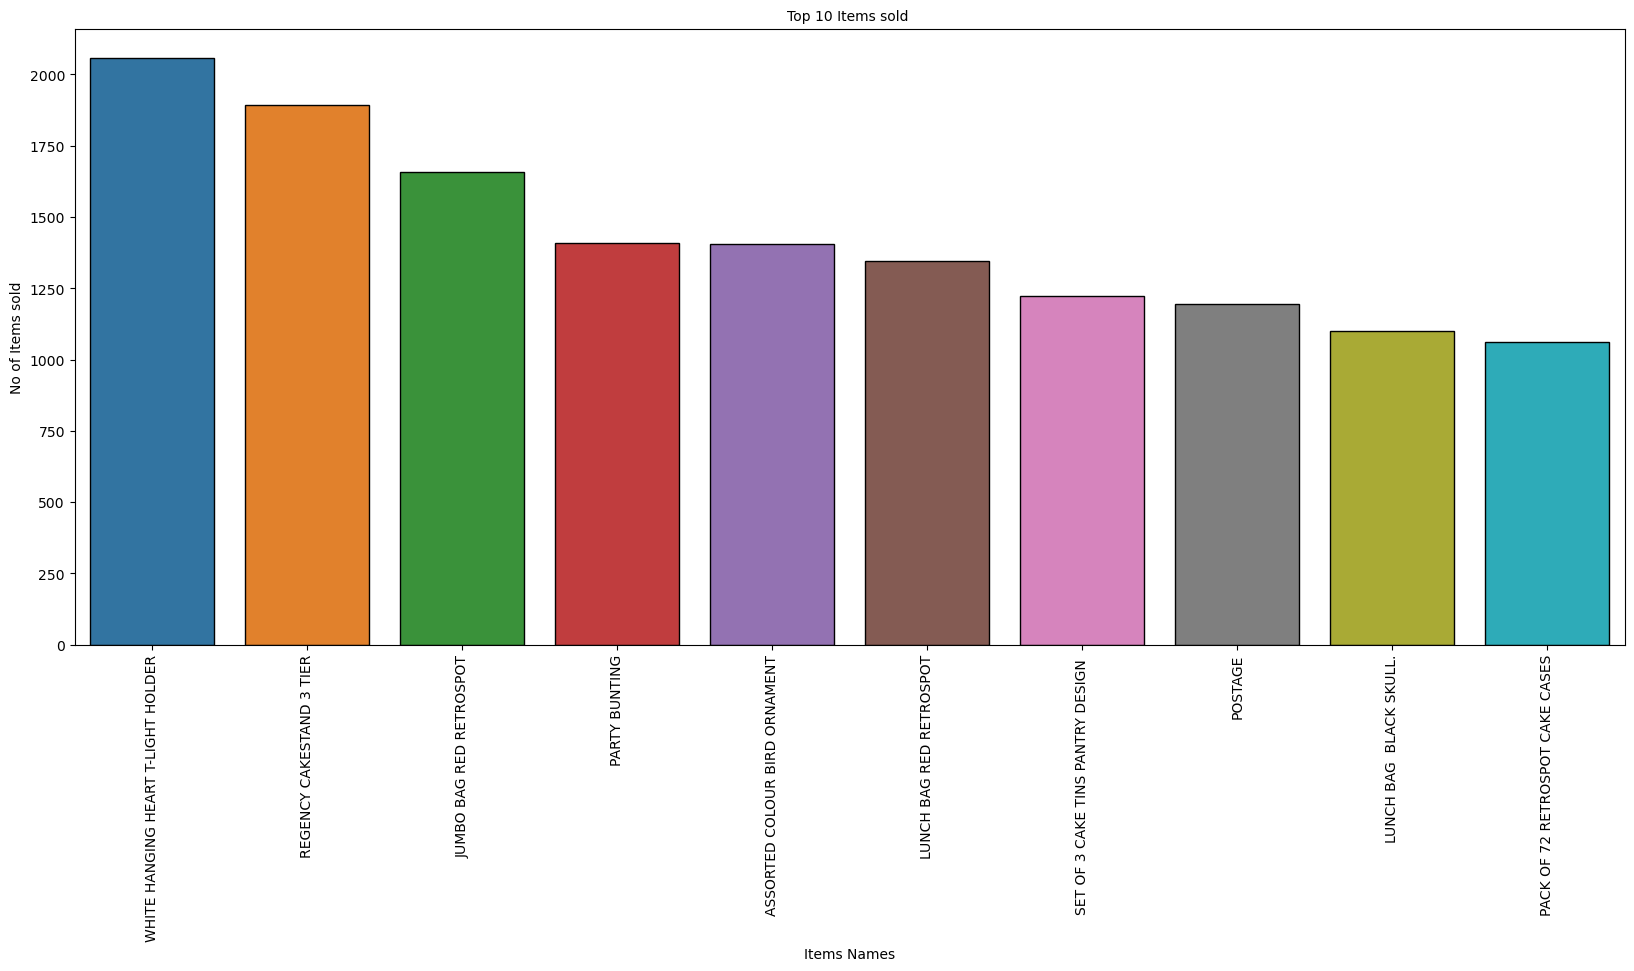

In [14]:
# Barplot of top 10 product sold
plt.figure(figsize=(20,8))
sns.barplot(x='Description Name',y='Count',data=product_top_10[0:10],edgecolor='black')
plt.xlabel('Items Names',fontsize=10)
plt.ylabel('No of Items sold',fontsize=10)
plt.title("Top 10 Items sold ",fontsize=10)
plt.tight_layout
plt.xticks(rotation=90)

White Handling Heart-TLight Holder was the sold max and Pack fo 72 Retrospoty cake cases was the minimum sold into Online Retail.

In [15]:
# Top 10 countries buying maximum products
top_country=data['Country'].value_counts().reset_index()
top_country.rename(columns={'index':'Country Name','Country':'Count'},inplace=True)
top_country[:10]

,Country Name,Count
0,United Kingdom,356728
1,Germany,9480
2,France,8475
3,EIRE,7475
4,Spain,2528
5,Netherlands,2371
6,Belgium,2069
7,Switzerland,1877
8,Portugal,1471
9,Australia,1258


Text(0.5, 1.0, 'Top 10 Countries buying products')

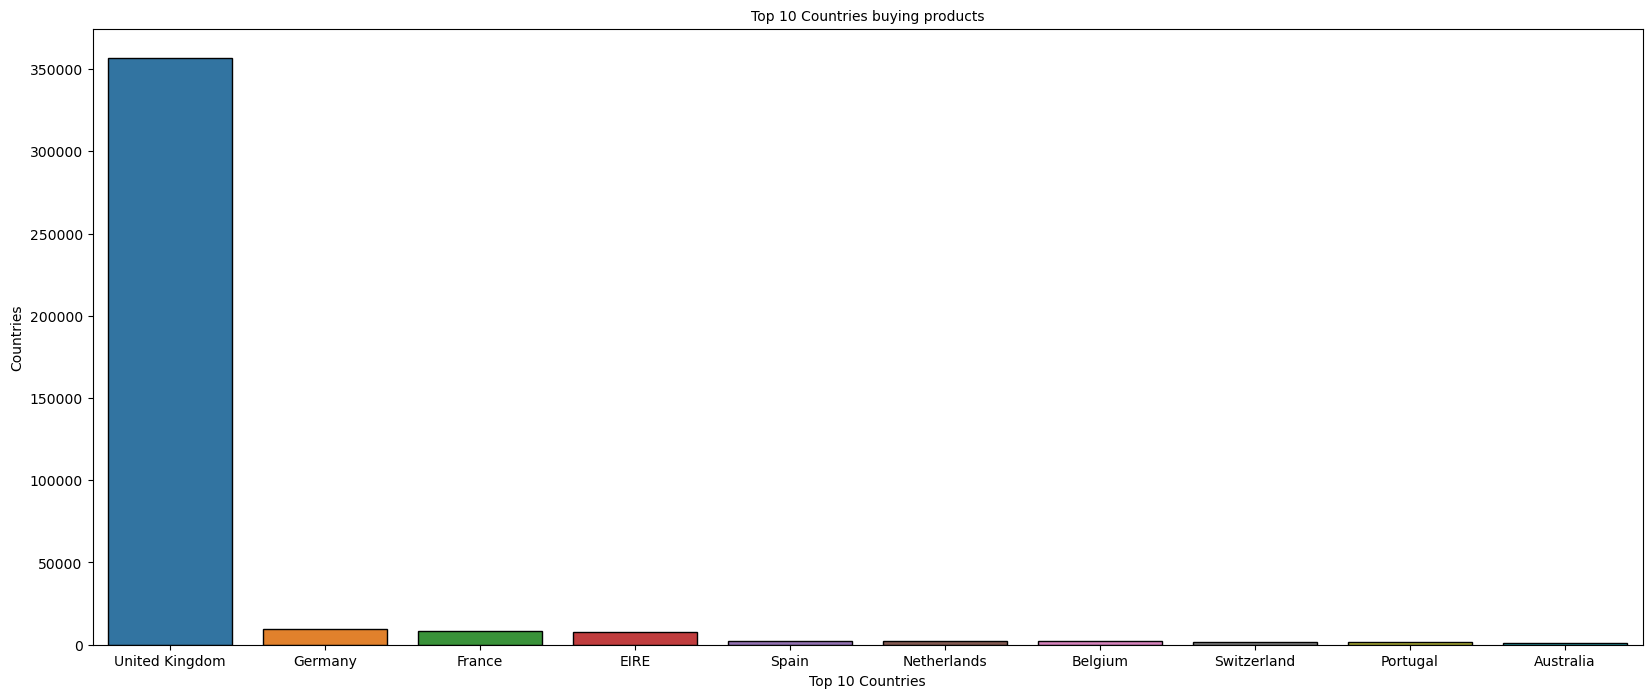

In [16]:
# Barplot of top 10 Countries buying Maximum prodcuts
plt.figure(figsize=(20,8))
sns.barplot(x='Country Name',y='Count',data=top_country[0:10],edgecolor='black')
plt.xlabel('Top 10 Countries',fontsize=10)
plt.ylabel('Countries',fontsize=10)
plt.title('Top 10 Countries buying products',fontsize=10)


In [17]:
# United Kingdom was the highest Country to buyer the producted adn Australia was the lowest buyer for the same

C:\Users\DHEERU\anaconda3 D\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distibution on Quantity')

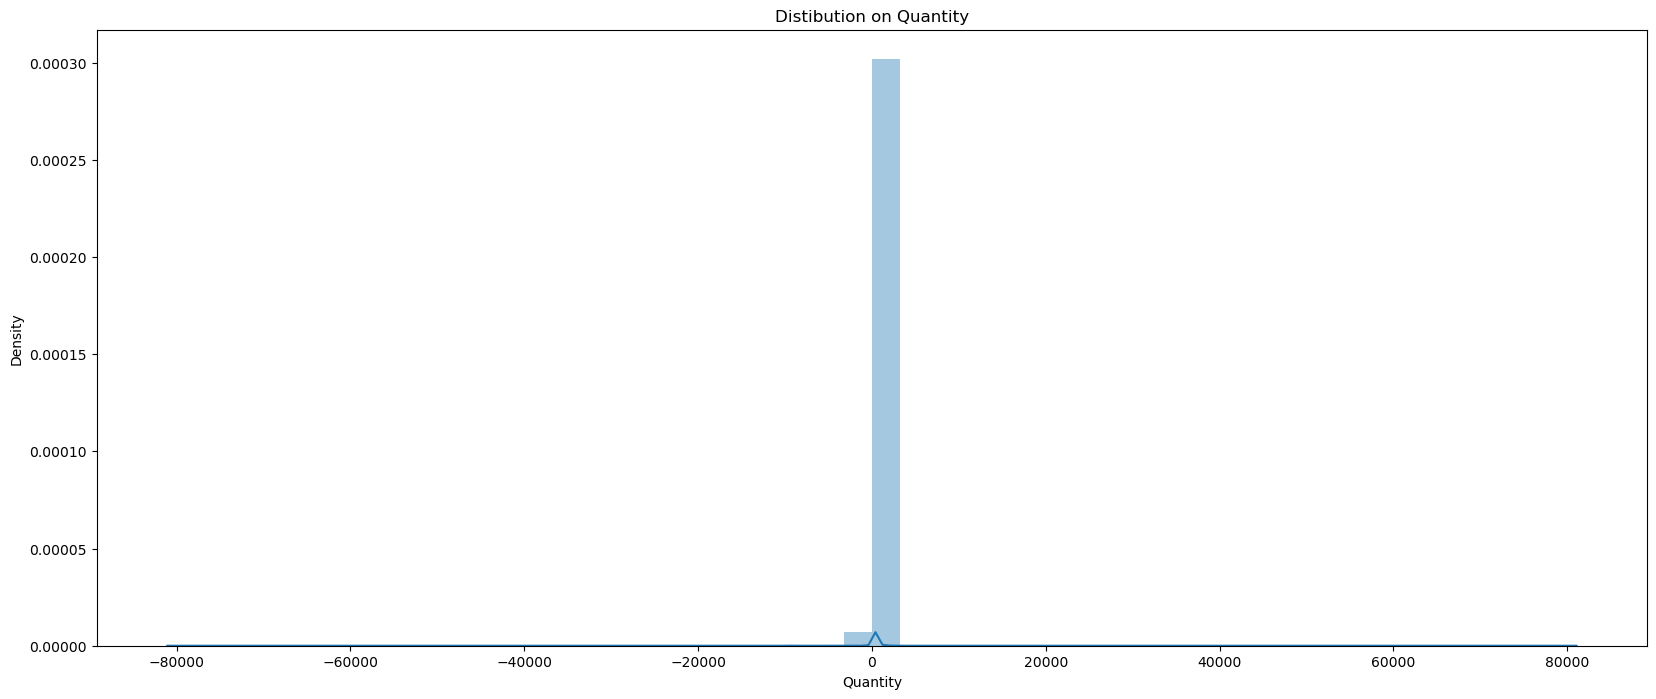

In [18]:
# Check the data distribution on Quantity columns
plt.figure(figsize=(20,8))
sns.distplot(data['Quantity'])
plt.title('Distibution on Quantity')

C:\Users\DHEERU\anaconda3 D\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\DHEERU\anaconda3 D\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Log Distribution on Quantity')

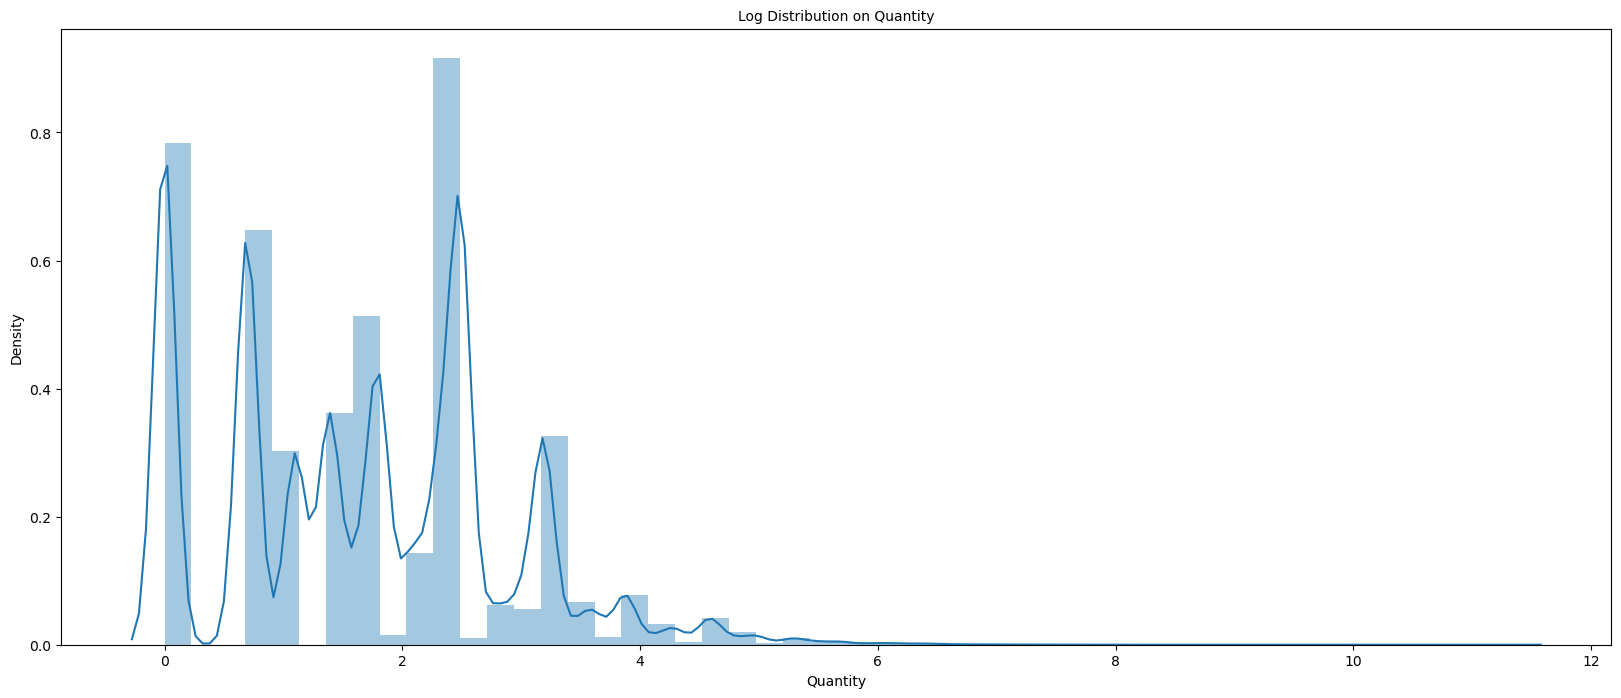

In [19]:
# Log transfomation
plt.figure(figsize=(20,8))
sns.distplot(np.log(data['Quantity']))
plt.title("Log Distribution on Quantity",fontsize=10)


In [20]:
# the Quantity for the products max was 2 sold and then lowest was 10 

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    401604 non-null  object 
 1   StockCode    401604 non-null  object 
 2   Description  401604 non-null  object 
 3   Quantity     401604 non-null  int64  
 4   InvoiceDate  401604 non-null  object 
 5   UnitPrice    401604 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      401604 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.6+ MB


In [22]:
data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'])

In [23]:
# Converting Date columns into Data Fromate
data["Year"]=data['InvoiceDate'].apply(lambda x:x.year)
data["Month"]=data['InvoiceDate'].apply(lambda x:x.month)
data["Day"]=data['InvoiceDate'].apply(lambda x:x.day)
data["Hour"]=data['InvoiceDate'].apply(lambda x:x.hour)
data["Min"]=data['InvoiceDate'].apply(lambda x:x.minute)


In [24]:
# we have created some new columns with Data, Month, Year, Hour and Minutes to perfome datatime coulmns easily.
data.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Hour,Min
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,26
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26


C:\Users\DHEERU\anaconda3 D\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Total Amount ')

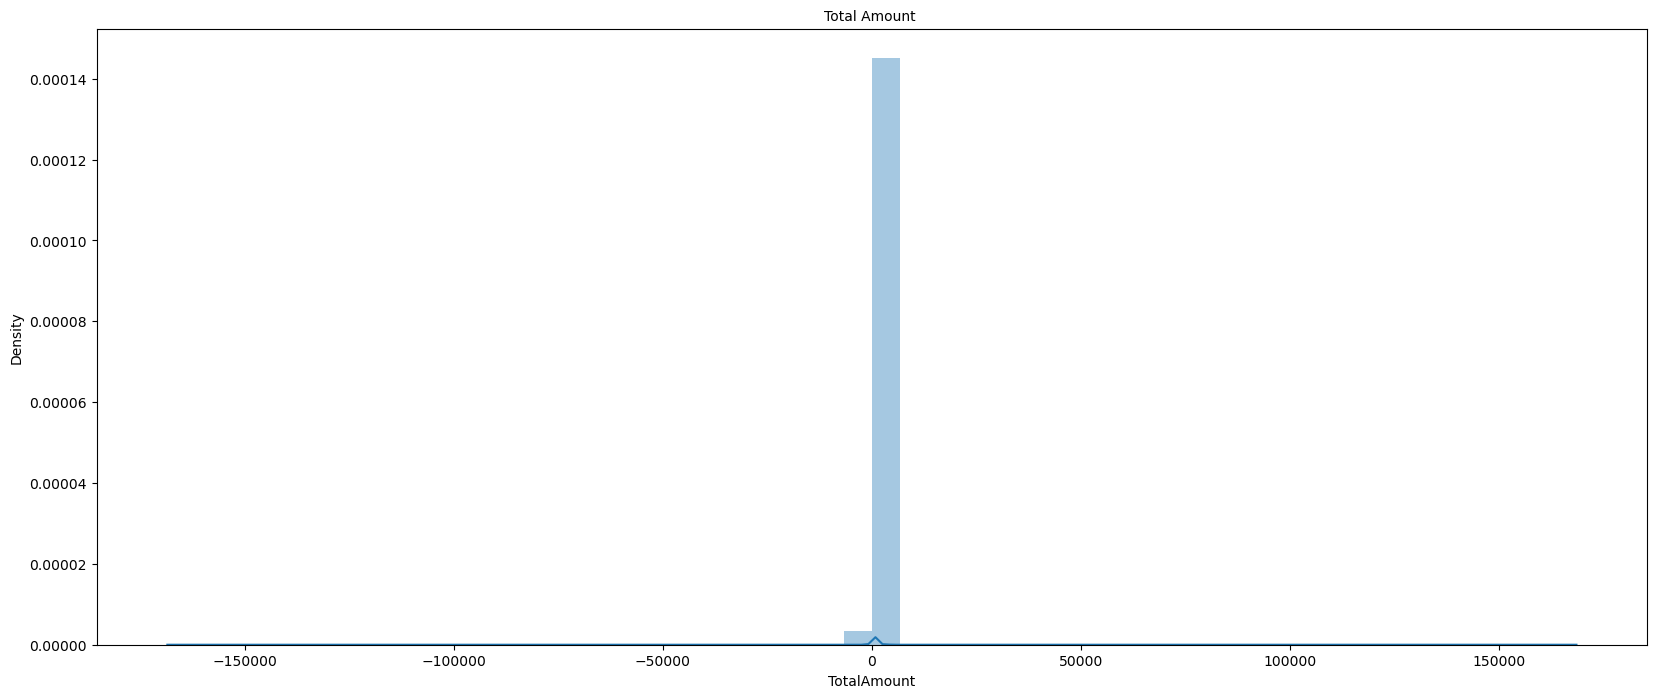

In [25]:
# check the distribution of total amount
data['TotalAmount']=data['UnitPrice']*data['Quantity']
plt.figure(figsize=(20,8))
sns.distplot(data['TotalAmount'])
plt.title('Total Amount ',fontsize=10)

C:\Users\DHEERU\anaconda3 D\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


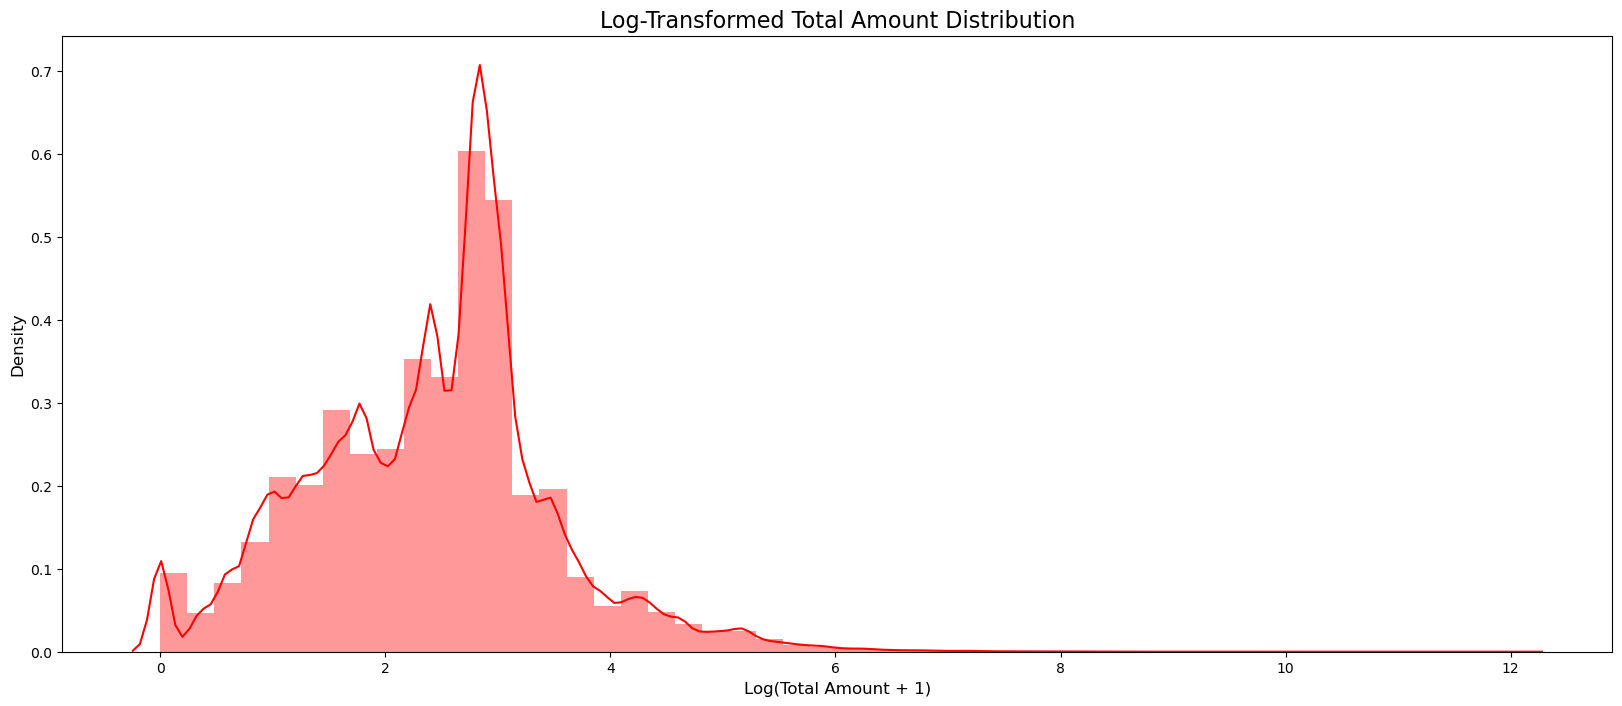

In [26]:
# Log Distribution of TotalAmount
data['TotalAmount'] = data['TotalAmount'].apply(lambda x: max(1e-10, x))
plt.figure(figsize=(20, 8))
sns.distplot(np.log1p(data['TotalAmount']), color='r')
plt.title('Log-Transformed Total Amount Distribution', fontsize=16)
plt.xlabel('Log(Total Amount + 1)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

In [27]:
# 5 number summary of numerical columns
data.describe()

,Quantity,UnitPrice,CustomerID,Year,Month,Day,Hour,Min,TotalAmount
count,401604.000000,401604.000000,401604.000000,401604.000000,401604.000000,401604.000000,401604.000000,401604.000000,4.016040e+05
mean,12.183273,3.474064,15281.160818,2010.934378,7.595407,15.038623,12.731031,30.396311,2.212928e+01
std,250.283037,69.764035,1714.006089,0.247620,3.417451,8.652640,2.288211,17.088438,3.076461e+02
min,-80995.000000,0.000000,12346.000000,2010.000000,1.000000,1.000000,6.000000,0.000000,1.000000e-10
25%,2.000000,1.250000,13939.000000,2011.000000,5.000000,7.000000,11.000000,16.000000,4.250000e+00
50%,5.000000,1.950000,15145.000000,2011.000000,8.000000,15.000000,13.000000,31.000000,1.170000e+01
75%,12.000000,3.750000,16784.000000,2011.000000,11.000000,22.000000,14.000000,45.000000,1.980000e+01
max,80995.000000,38970.000000,18287.000000,2011.000000,12.000000,31.000000,20.000000,59.000000,1.684696e+05


In [28]:
# number summru of Categorical columns
data.describe(include='object')

,InvoiceNo,StockCode,Description,Country
count,401604,401604,401604,401604
unique,22190,3684,3896,37
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,542,2065,2058,356728


count    4.016040e+05
mean     2.212928e+01
std      3.076461e+02
min      1.000000e-10
25%      4.250000e+00
50%      1.170000e+01
75%      1.980000e+01
max      1.684696e+05
Name: TotalAmount, dtype: float64


<AxesSubplot:>

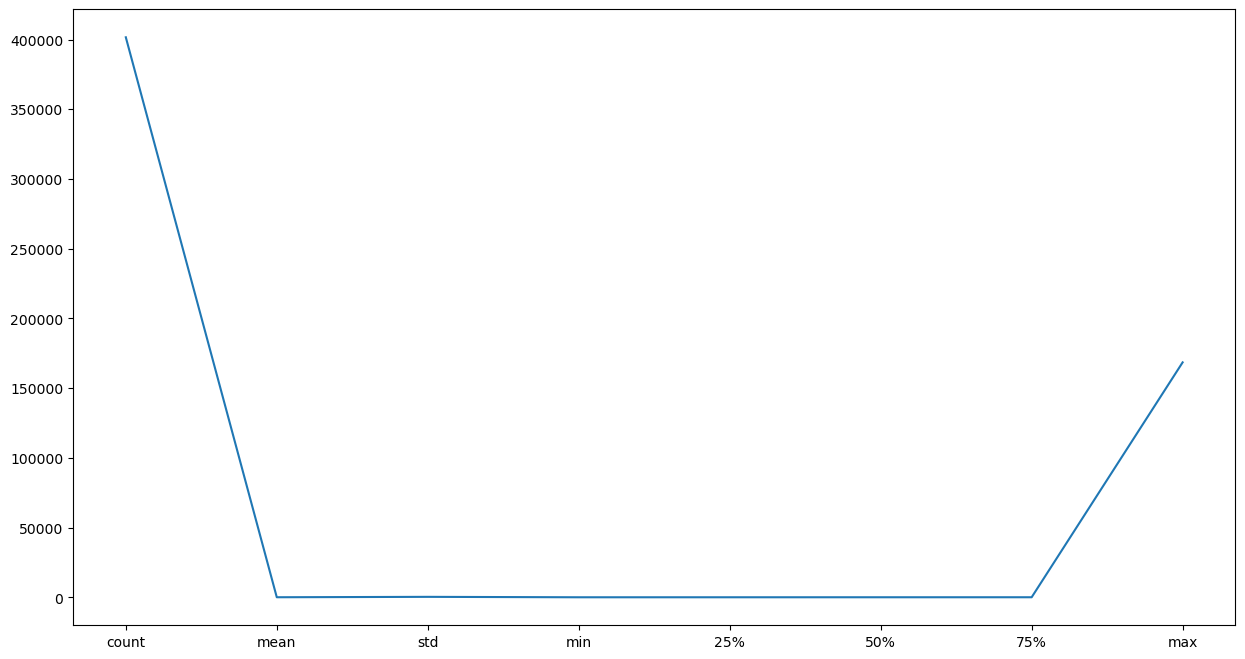

In [29]:
# check the distribution of TotalAmount
print(data['TotalAmount'].describe())

# plot the descriotion of totalAmount
plt.figure(figsize=(15,8))
data['TotalAmount'].describe().plot()

In [30]:
data.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Hour,Min,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,26,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,20.34


In [31]:
# Extract Day Name from InvoiceDate columns
data['DayName']=data['InvoiceDate'].dt.day_name()

In [32]:
# Chekc the purchase as per days of weeks
days=data['DayName'].value_counts().reset_index()
days.rename(columns={'index':'Day_name','DayName':'Count'},inplace=True)
days


,Day_name,Count
0,Thursday,81575
1,Wednesday,69753
2,Tuesday,67376
3,Monday,65715
4,Sunday,61673
5,Friday,55512


Text(0.5, 1.0, 'No of shopping days')

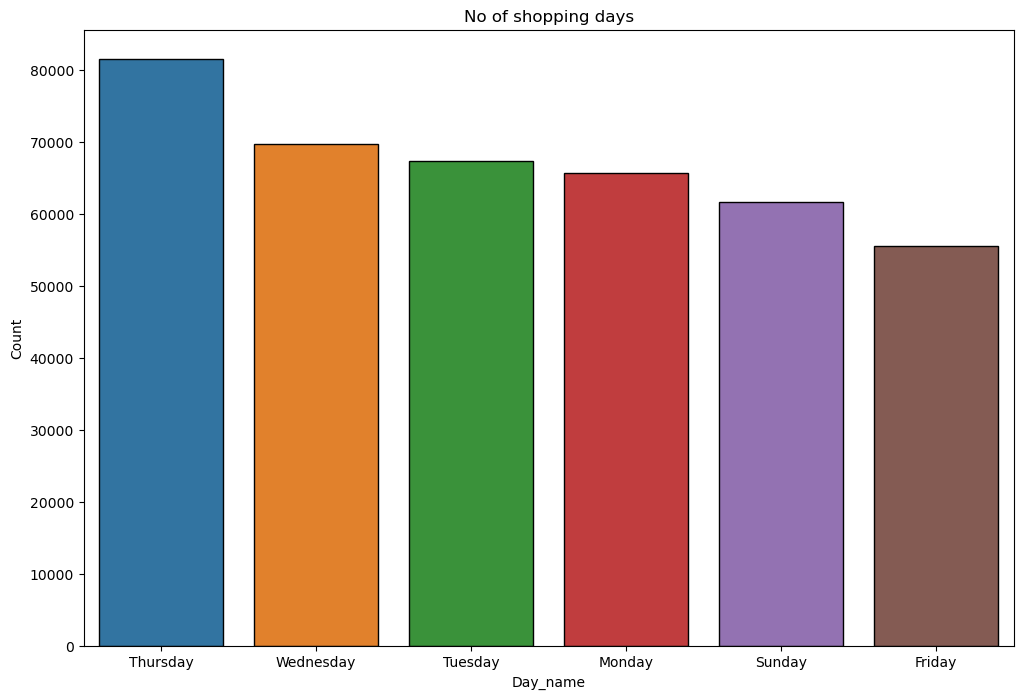

In [33]:
# Plotting the days on which have purchase
plt.figure(figsize=(12,8))
sns.barplot(x='Day_name',y="Count",data=days,edgecolor='black')
plt.title("No of shopping days")

In [34]:
# Online sale was majourly done on Thusday and less on Friday

In [35]:
# Extract the month Name from Invoice Date columns.
data['MonthName']=data['InvoiceDate'].dt.month_name()


# CHeck the purched as per month wise.
month=data['MonthName'].value_counts().reset_index()
month.rename(columns={'index':'Month_Name','MonthName':'Count'},inplace=True)
month

,Month_Name,Count
0,November,64232
1,October,49928
2,December,43736
3,September,40459
4,May,28661
5,June,27576
6,March,27516
7,August,27444
8,July,27256
9,April,22988


Text(0.5, 1.0, 'No of shopping days')

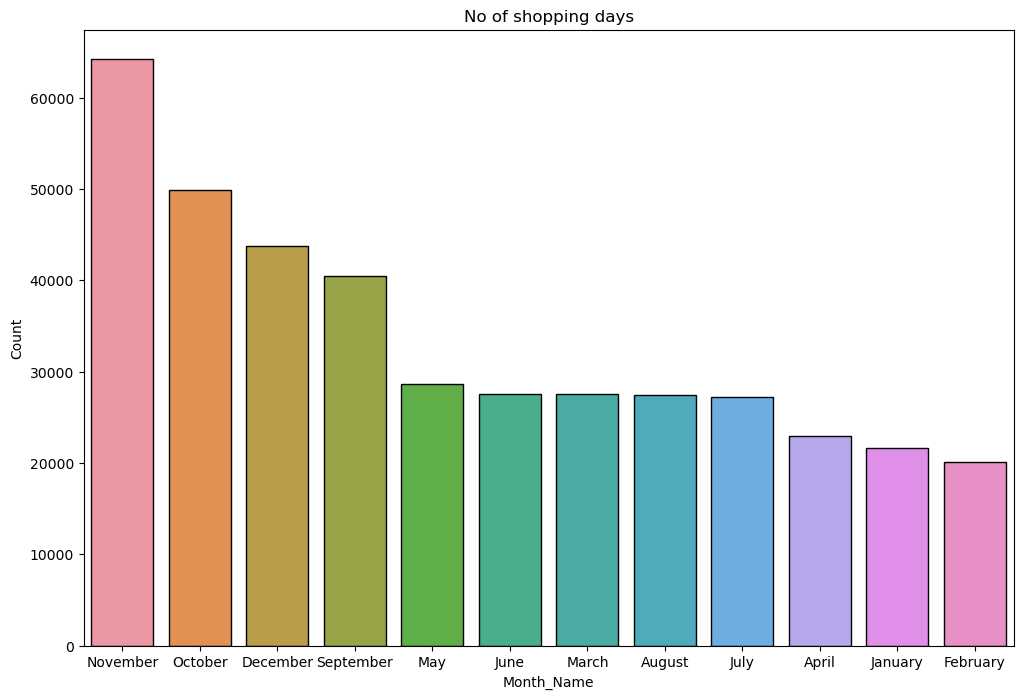

In [36]:
# Plotting the Monthly Purchase
plt.figure(figsize=(12,8))
sns.barplot(x='Month_Name',y="Count",data=month,edgecolor='black')
plt.title("No of shopping days")

In [37]:
# MAximum purhcas was done in month of Nov, then Oct, Dec and Sep. Minimum purchase by customer was in Feb.

In [38]:
data.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Hour,Min,TotalAmount,DayName,MonthName
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,26,15.30,Wednesday,December
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,20.34,Wednesday,December


In [39]:
# Check the purhcas by hour baisis.
hour_df=data['Hour'].value_counts().reset_index()
hour_df.rename(columns={'index':'Hours_NO','Hour':'Count'},inplace=True)
hour_df

,Hours_NO,Count
0,12,72213
1,13,64051
2,14,54194
3,11,49525
4,15,45641
5,10,38725
6,16,24618
7,9,22446
8,17,13604
9,8,8789


<AxesSubplot:xlabel='Hours_NO', ylabel='Count'>

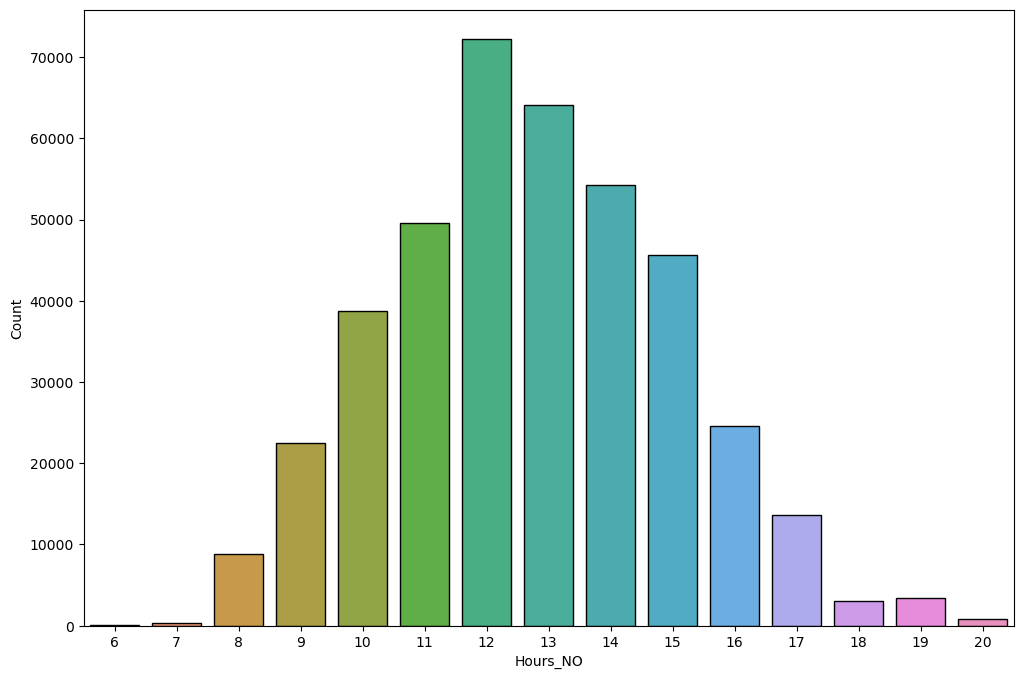

In [40]:
# ploting the purchase by hours basis.
plt.figure(figsize=(12,8))
sns.barplot(x='Hours_NO',y='Count',data=hour_df,edgecolor='Black')

In [41]:
# From above graph we can see the maximum pucharase was done in afternoon till 15.00 and around 18.00 had 
#very less purcharse and in morning time had almost verly low purchasr 

In [42]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Hour,Min,TotalAmount,DayName,MonthName
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,26,15.30,Wednesday,December
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,20.34,Wednesday,December
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,26,22.00,Wednesday,December
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,20.34,Wednesday,December
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,20.34,Wednesday,December
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011,12,9,12,50,10.20,Friday,December
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12,9,12,50,12.60,Friday,December
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,9,12,50,16.60,Friday,December
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,9,12,50,16.60,Friday,December


# 5. Choosing the Algorithm for the Project

# RFM model (Recency, Frequency and Monetary value)

In [43]:
# RFM is a marketing analysis tool used to identify a company's or an organization's best
# customers by using certain measures. The RFM model is based on three quantitative factors: . Frequency: How often a 
# customer makes a purchase. Monetary Value: How much money a customer spends on.

- Recency = Latest Date - Last Inovice Data
- Frequency = count of invoice no. of transaction(s)
- Monetary = Sum of Total Amount for each customer

In [44]:
import datetime as dt

# as per out dataset first invociedate is 2010-12-01 and last Invoicedate is 2011-12-09
LatestDate=dt.datetime(2011,12,9)

# Create RFM model for each coustomer

#Create RFM Modelling scores for each customer
Customer_Data = data.groupby('CustomerID').agg({'InvoiceDate': lambda x: (LatestDate - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

#Convert Invoice Date into type int
Customer_Data['InvoiceDate'] = Customer_Data['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
Customer_Data.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'TotalAmount': 'Monetary'}, inplace=True)

Customer_Data.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,324,2,77183.60
1,12347.0,1,182,4310.00
2,12348.0,74,31,1797.24
3,12349.0,17,73,1757.55
4,12350.0,309,17,334.40


In [45]:
Customer_Data

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,324,2,77183.60
12347.0,1,182,4310.00
12348.0,74,31,1797.24
12349.0,17,73,1757.55
12350.0,309,17,334.40
...,...,...,...
18280.0,276,10,180.60
18281.0,179,7,80.82
18282.0,6,13,178.05


C:\Users\DHEERU\anaconda3 D\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DHEERU\anaconda3 D\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DHEERU\anaconda3 D\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

Text(0.5, 1.0, 'Log Distribution of Monetary on Customer Purchase ')

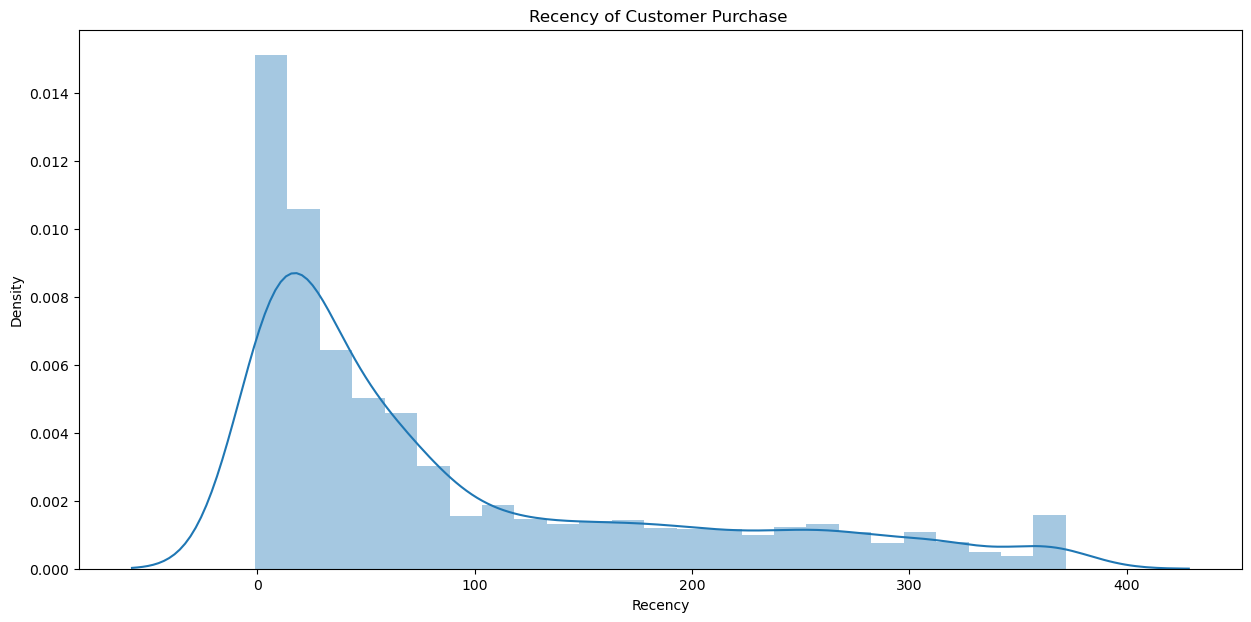

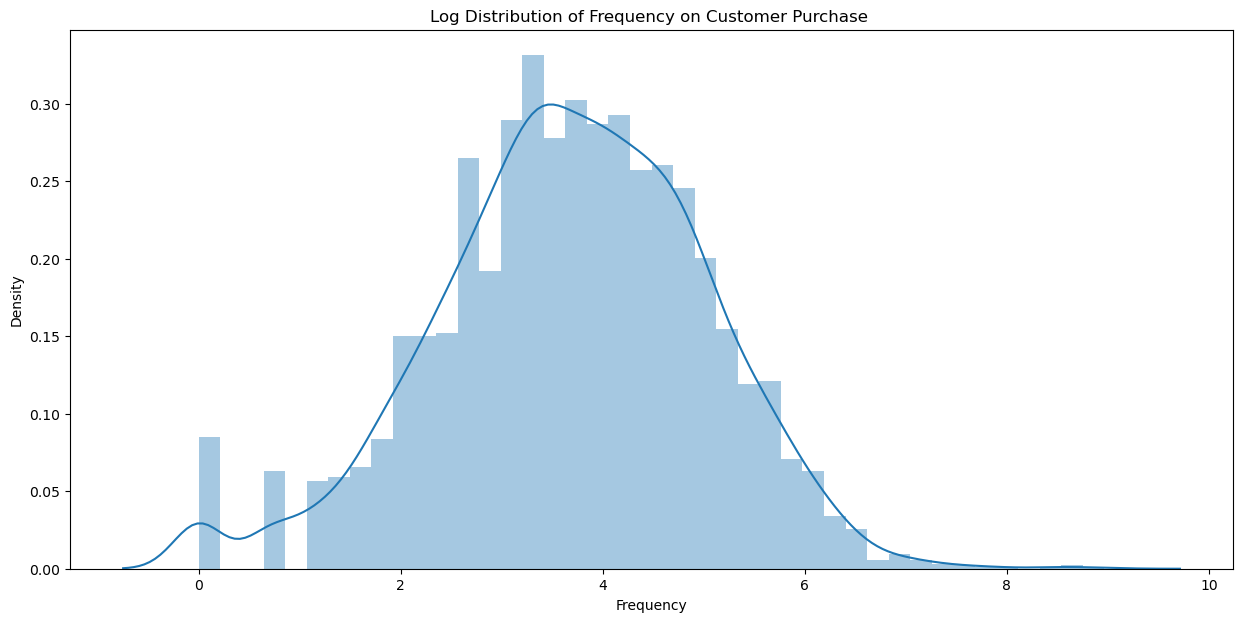

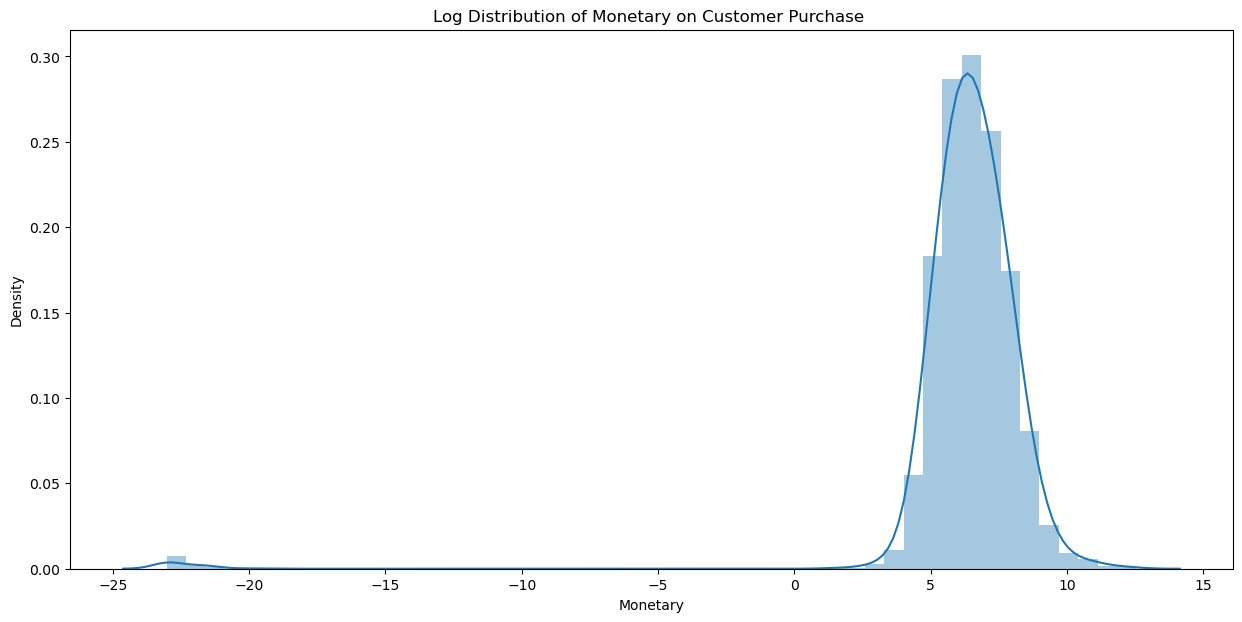

In [46]:
#Recency distribution plot
x = Customer_Data['Recency']
plt.figure(figsize=(15,7))
sns.distplot(x)
plt.title("Recency of Customer Purchase ")

#Frequency distribution plot
x = Customer_Data['Frequency']
plt.figure(figsize=(15,7))
sns.distplot(np.log(x))
plt.title("Log Distribution of Frequency on Customer Purchase ")

#Monetary distribution plot
x = Customer_Data['Monetary']
plt.figure(figsize=(15,7))
sns.distplot(np.log(x))
plt.title("Log Distribution of Monetary on Customer Purchase ")


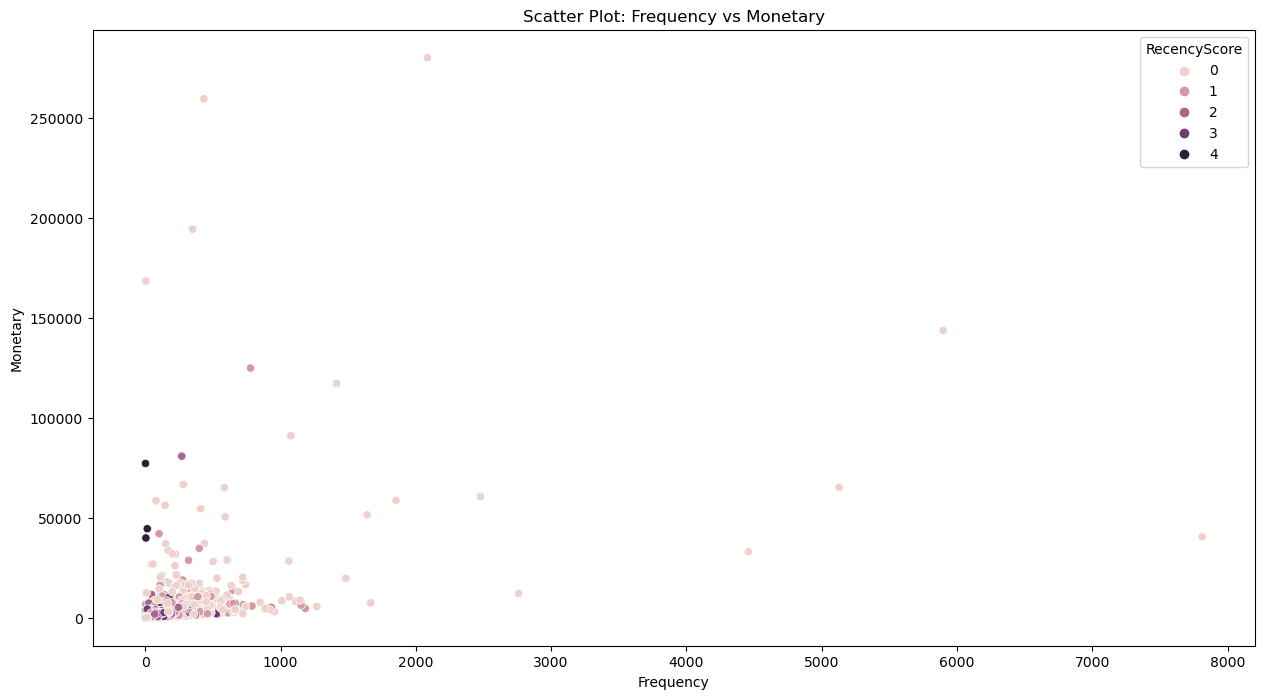

In [47]:
# RFM Analysis
Customer_Data['RecencyScore'] = pd.qcut(Customer_Data['Recency'], q=5, labels=False)
Customer_Data['FrequencyScore'] = pd.qcut(Customer_Data['Frequency'], q=5, labels=False)
Customer_Data['MonetaryScore'] = pd.qcut(Customer_Data['Monetary'], q=5, labels=False)

# Customer Segmentation
Customer_Data['Segment'] = 100 * Customer_Data['RecencyScore'] + 10 * Customer_Data['FrequencyScore'] + Customer_Data['MonetaryScore']

# Visualizations
plt.figure(figsize=(15, 8))
sns.scatterplot(x='Frequency', y='Monetary', hue='RecencyScore', data=Customer_Data)
plt.title('Scatter Plot: Frequency vs Monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.show()

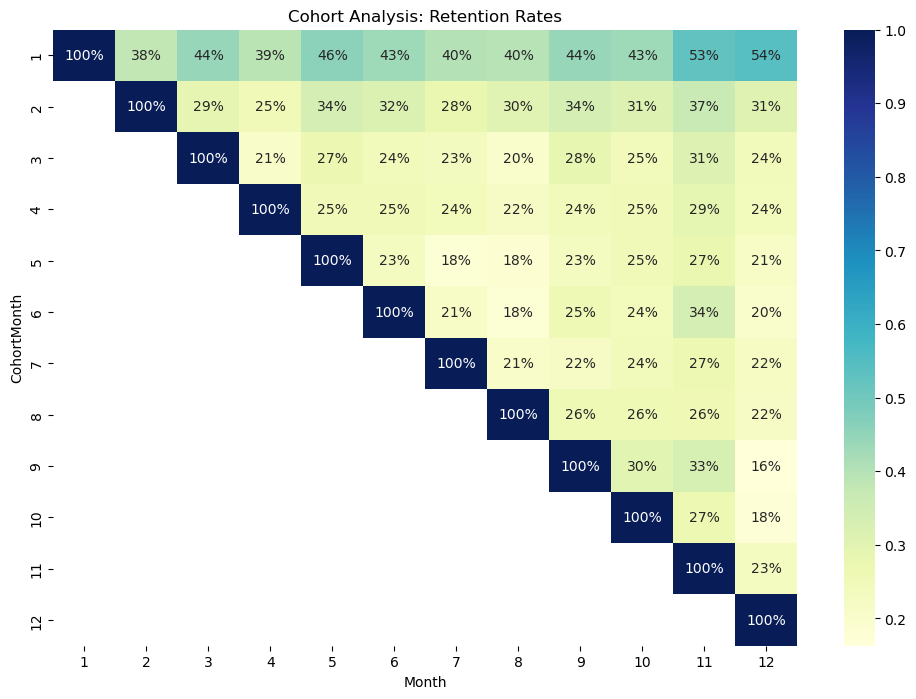

In [48]:
# Cohort Analysis
# Assuming you have a 'InvoiceMonth' column indicating the month of the invoice
cohort_data = data.groupby(['Month', 'CustomerID']).agg({'TotalAmount': 'sum'}).reset_index()
cohort_data['CohortMonth'] = cohort_data.groupby('CustomerID')['Month'].transform('min')

# Retention Rate Calculation
cohort_counts = cohort_data.groupby(['CohortMonth', 'Month']).agg({'CustomerID': 'nunique'}).reset_index()
cohort_counts['RetentionRate'] = cohort_counts['CustomerID'] / cohort_counts.groupby('CohortMonth')['CustomerID'].transform('first')

# Plot Retention Rates
plt.figure(figsize=(12, 8))
sns.heatmap(pd.pivot_table(cohort_counts, values='RetentionRate', index='CohortMonth', columns='Month'), cmap='YlGnBu', annot=True, fmt='.0%')
plt.title('Cohort Analysis: Retention Rates')
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

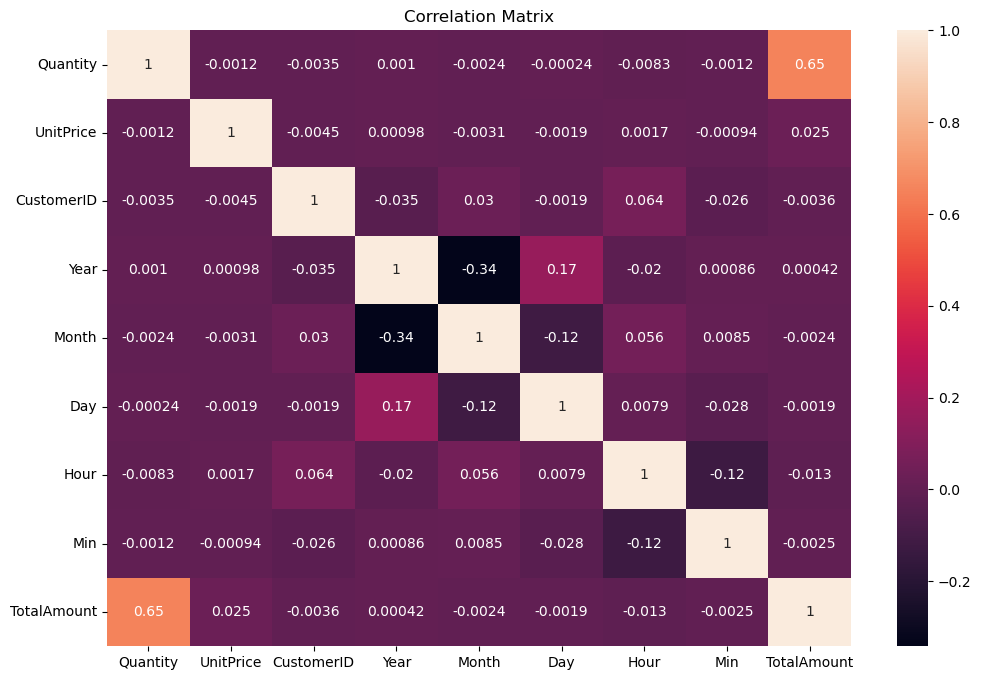

In [49]:
#Correlation between variours columns
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True)
plt.title("Correlation Matrix")

# 6. Motivation and Reasons For Choosing the Algorithm & Assumptions

RFM stands for Recency, Frequency, and Monetary Value, and it is a method used in marketing and customer relationship 
management to analyze and categorize customers based on their transaction behavior. Each of the three components represents
a key aspect of a customer's purchasing behavior:

Recency (R):

Refers to how recently a customer has made a purchase.
Typically measured as the time elapsed since the customer's last purchase.
A lower recency value indicates a more recent purchase, which is often associated with higher engagement.
Frequency (F):

Represents how often a customer makes a purchase.
Calculated as the total number of transactions or orders made by the customer.
Higher frequency values suggest a more loyal and engaged customer.
Monetary Value (M):

Represents the total monetary value of a customer's purchases.
Calculated by summing the monetary value of all transactions made by the customer.
Indicates the customer's overall spending or contribution to revenue.


RFM analysis helps businesses understand and target their customers more effectively, allowing for personalized
marketing efforts and improved customer retention. It is commonly used in combination with data analytics and machine
learning techniques for more sophisticated customer segmentation and prediction.

#    # 7 Model Evaluation and Techniques

# K-Mean Clustring

In [50]:
Customer_Data

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,Segment
CustomerID,,,,,,,
12346.0,324,2,77183.60,4,0,4,404
12347.0,1,182,4310.00,0,4,4,44
12348.0,74,31,1797.24,3,2,3,323
12349.0,17,73,1757.55,1,3,3,133
12350.0,309,17,334.40,4,1,1,411
...,...,...,...,...,...,...,...
18280.0,276,10,180.60,4,0,0,400
18281.0,179,7,80.82,4,0,0,400
18282.0,6,13,178.05,0,0,0,0


# Applying Silhouette Method on Recency ,Frequency and Monetary

In [51]:
Customer_Data

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,Segment
CustomerID,,,,,,,
12346.0,324,2,77183.60,4,0,4,404
12347.0,1,182,4310.00,0,4,4,44
12348.0,74,31,1797.24,3,2,3,323
12349.0,17,73,1757.55,1,3,3,133
12350.0,309,17,334.40,4,1,1,411
...,...,...,...,...,...,...,...
18280.0,276,10,180.60,4,0,0,400
18281.0,179,7,80.82,4,0,0,400
18282.0,6,13,178.05,0,0,0,0


In [52]:
from sklearn.preprocessing import StandardScaler
import math

Customer_Data['Recency_log'] = np.log1p(Customer_Data['Recency'])
Customer_Data['Frequency_log'] = np.log1p(Customer_Data['Frequency'])
Customer_Data['Monetary_log'] = np.log1p(Customer_Data['Monetary'])

C:\Users\DHEERU\anaconda3 D\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [53]:
feature=['Recency_log','Frequency_log','Monetary_log']
X_features = Customer_Data[feature]
X_features.dropna(inplace=True)
X_scaled=X_features.values

X_scaled[np.isinf(X_scaled)] = np.nan
X_scaled = np.nan_to_num(X_scaled)

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X_scaled)

C:\Users\DHEERU\AppData\Local\Temp\ipykernel_2764\1351818865.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_features.dropna(inplace=True)


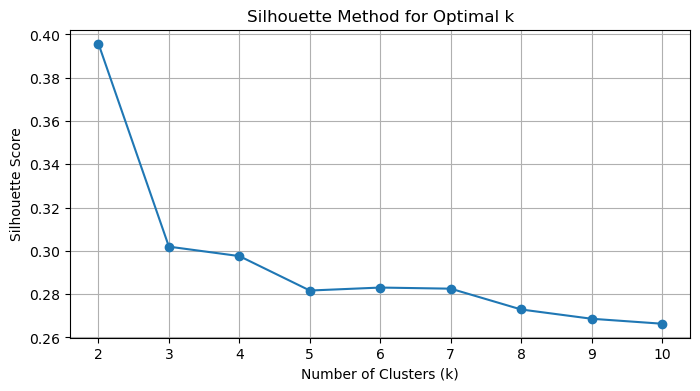

In [54]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Range of clusters to try
k_range = range(2, 11)
silhouette_scores = []

# Fit KMeans for each value of k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, labels)
    silhouette_scores.append(silhouette_avg)

# Plotting the silhouette scores
plt.figure(figsize=(8, 4))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.grid(True)
plt.show()

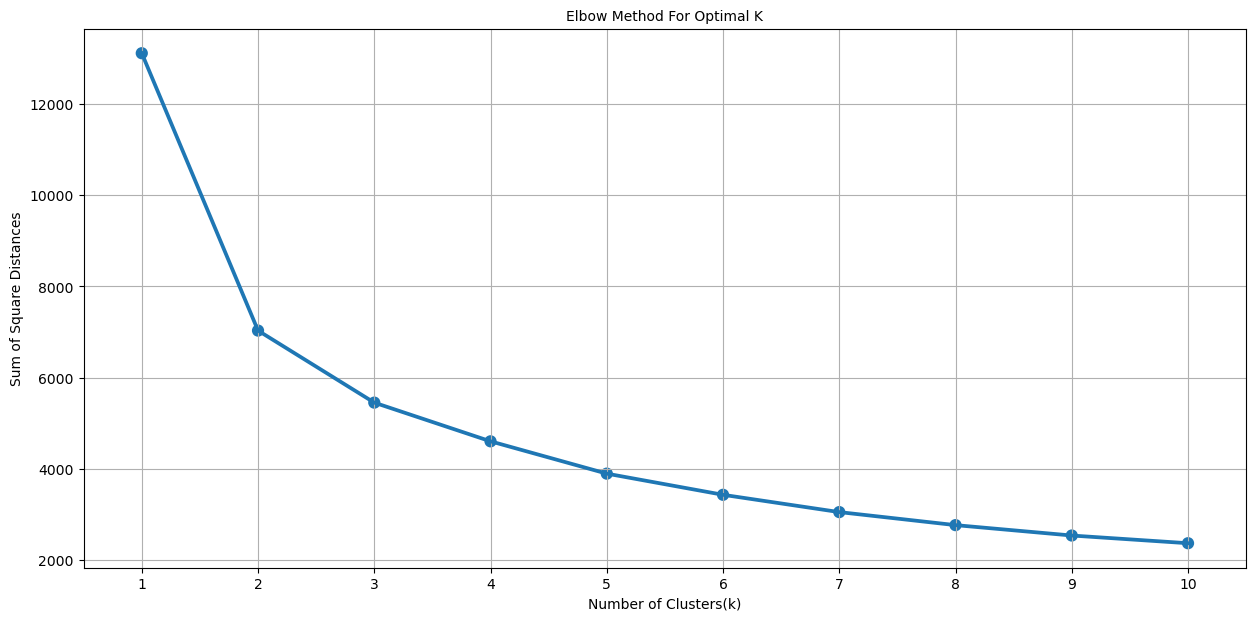

In [55]:
# Applying Elbow Method on Recency ,Frequency and Monetary to know the Clusters.

sum_of_sq_dist = {}
for k in range(1,11):
    El_kmeans = KMeans(n_clusters= k, max_iter= 1000)
    El_kmeans = El_kmeans.fit(X_scaled)
    sum_of_sq_dist[k] = El_kmeans.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(15,7))
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)', fontsize = 10)
plt.ylabel('Sum of Square Distances', fontsize = 10)
plt.title('Elbow Method For Optimal K', fontsize = 10)
plt.grid(True)
plt.show()

In [56]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(X_scaled)
y_kmeans=kmeans.predict(X_scaled)

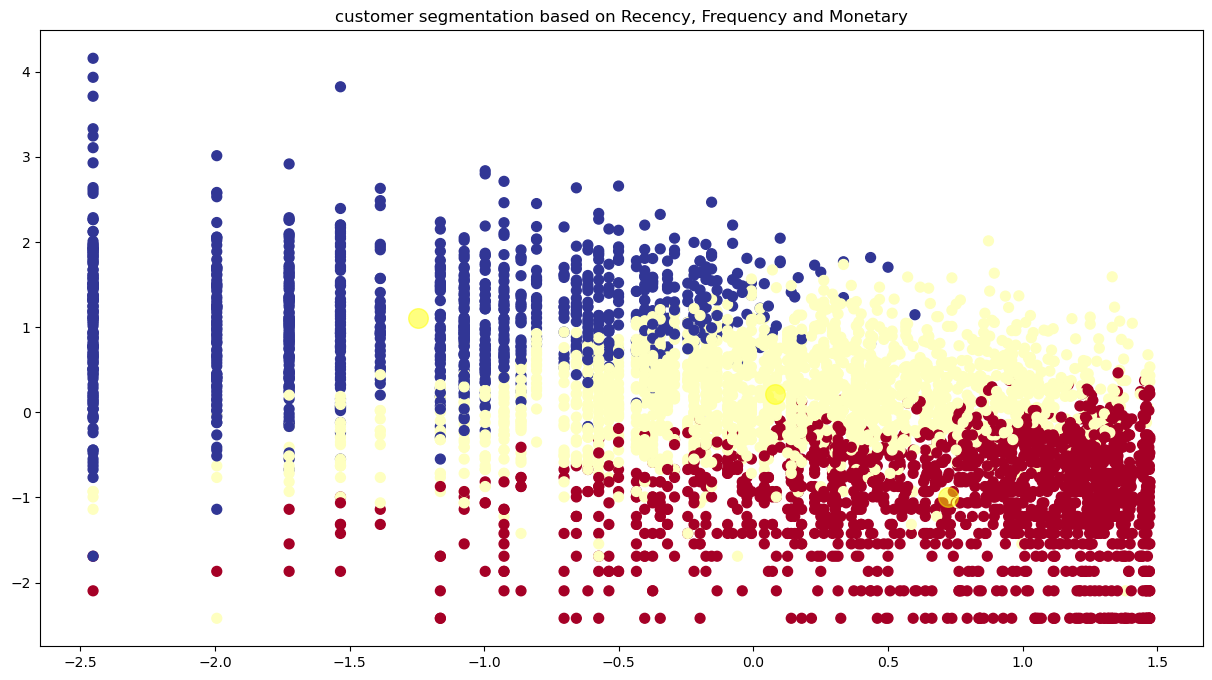

In [57]:
# customer segmentation based on Recency, Frequency and Monetary
plt.figure(figsize=(15,8))
plt.title('customer segmentation based on Recency, Frequency and Monetary')
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, s=50, cmap='RdYlBu')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5)

In [58]:
# As per above scatter plot we can see the customers are well sepreated by Recency ,Frequency and Monetary

In [59]:
Customer_Data

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,Segment,Recency_log,Frequency_log,Monetary_log
CustomerID,,,,,,,,,,
12346.0,324,2,77183.60,4,0,4,404,5.783825,1.098612,11.253955
12347.0,1,182,4310.00,0,4,4,44,0.693147,5.209486,8.368925
12348.0,74,31,1797.24,3,2,3,323,4.317488,3.465736,7.494564
12349.0,17,73,1757.55,1,3,3,133,2.890372,4.304065,7.472245
12350.0,309,17,334.40,4,1,1,411,5.736572,2.890372,5.815324
...,...,...,...,...,...,...,...,...,...,...
18280.0,276,10,180.60,4,0,0,400,5.624018,2.397895,5.201806
18281.0,179,7,80.82,4,0,0,400,5.192957,2.079442,4.404522
18282.0,6,13,178.05,0,0,0,0,1.945910,2.639057,5.187665


# K-Mean Clustring

In [60]:
# Perfoming k mean clustring
KMean_cluster=KMeans(n_clusters=3,max_iter=1000) # Kmean with 3 clusters
KMean_cluster.fit(X_scaled)

# find the cluster 
Customer_Data["Cluster"]=KMean_cluster.labels_
Customer_Data.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,Segment,Recency_log,Frequency_log,Monetary_log,Cluster
CustomerID,,,,,,,,,,,
12346.0,324,2,77183.60,4,0,4,404,5.783825,1.098612,11.253955,2
12347.0,1,182,4310.00,0,4,4,44,0.693147,5.209486,8.368925,1
12348.0,74,31,1797.24,3,2,3,323,4.317488,3.465736,7.494564,2
12349.0,17,73,1757.55,1,3,3,133,2.890372,4.304065,7.472245,2
12350.0,309,17,334.40,4,1,1,411,5.736572,2.890372,5.815324,0


In [61]:
# No of Cluster beloing to each customers.
Customer_Data['Cluster'].value_counts()

2    1839
0    1511
1    1022
Name: Cluster, dtype: int64

<AxesSubplot:xlabel='Recency', ylabel='Frequency'>

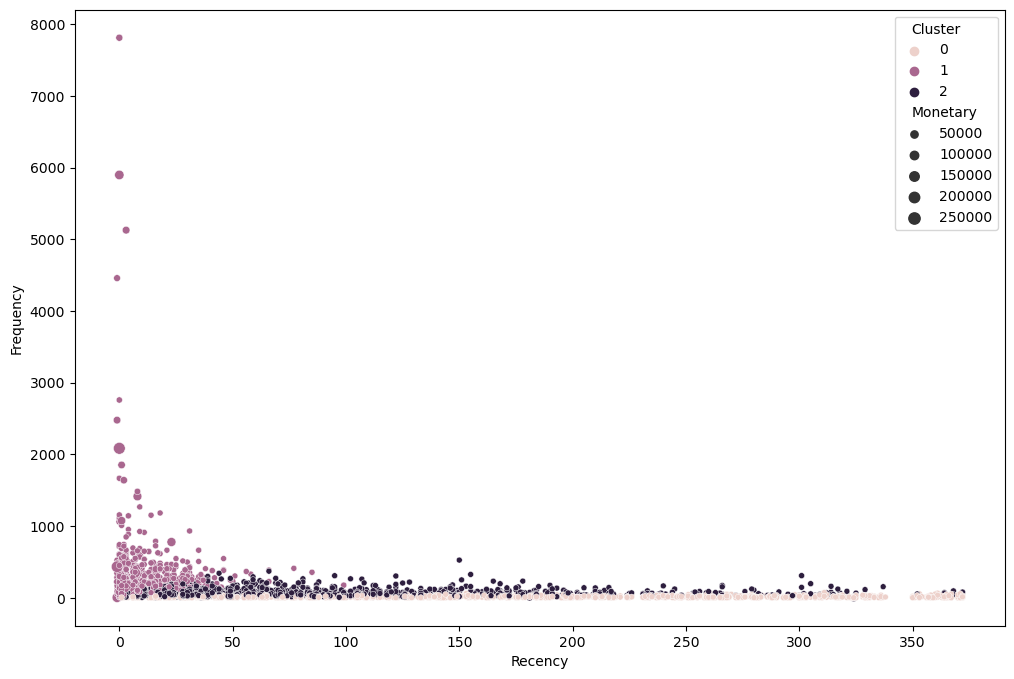

In [62]:
# Creating Scatter plot to understand the cluster
plt.figure(figsize=(12,8))
sns.scatterplot(x=Customer_Data['Recency'],y=Customer_Data['Frequency'],size=Customer_Data['Monetary'],hue=Customer_Data['Cluster'])

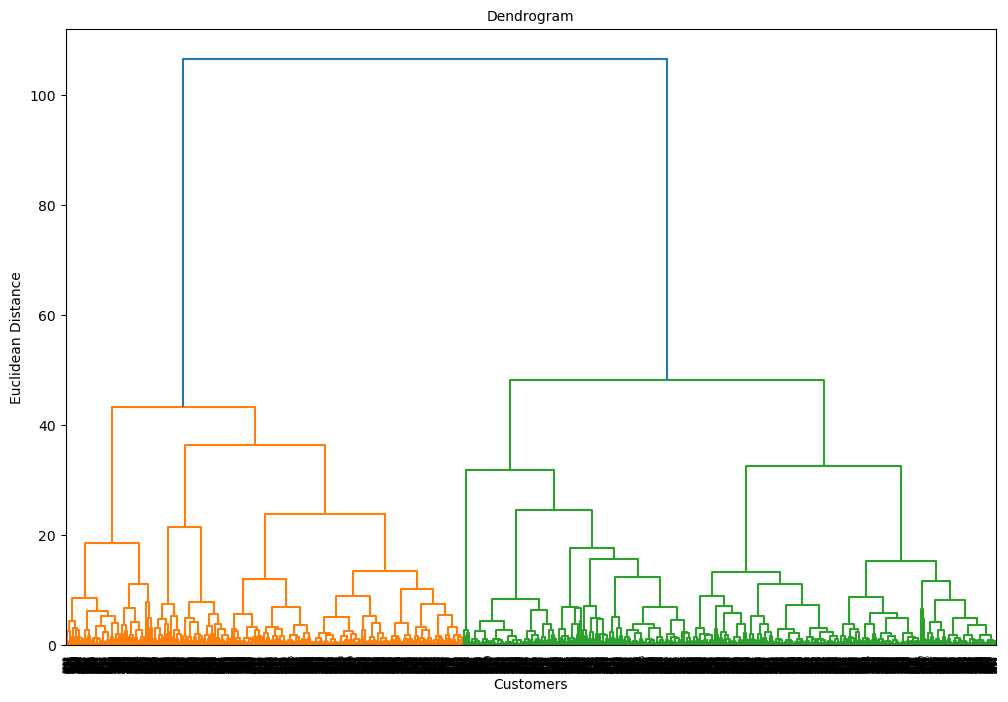

In [63]:
# Dendrogram to find the optimal numbers of clusters.
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Dendrogram', fontsize=10)
plt.xlabel('Customers', fontsize=10)
plt.ylabel('Euclidean Distance', fontsize=10)
plt.show()

# 8. Inferences from the Same

In [64]:
# The no of cluster will numbers of vertical lines which intersecting by the lines using the threshold of 50.

In [65]:
# Fitting the Hierarchical clustering into the datasets
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
pred_hc = hc.fit_predict(X_scaled)

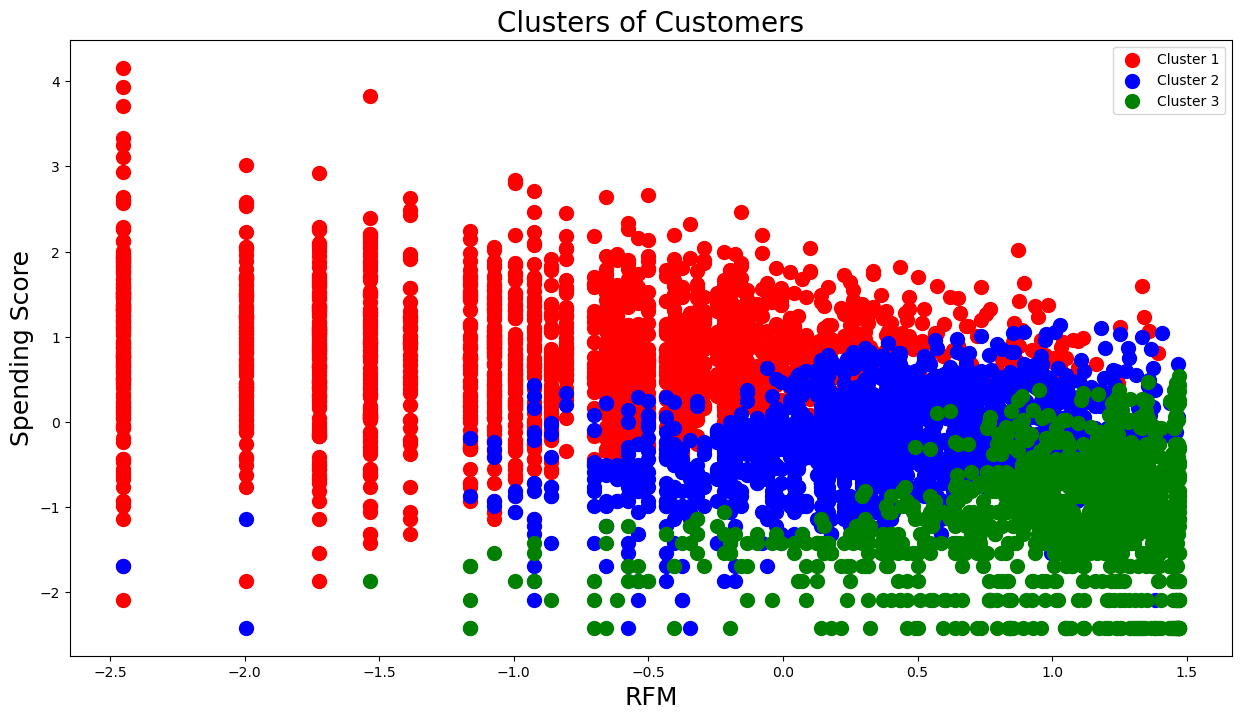

In [66]:
# Visualizing the clusters (two dimensions only)
plt.figure(figsize=(15, 8))
plt.scatter(X_scaled[pred_hc == 0, 0], X_scaled[pred_hc == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_scaled[pred_hc == 1, 0], X_scaled[pred_hc == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_scaled[pred_hc == 2, 0], X_scaled[pred_hc == 2, 1], s=100, c='green', label='Cluster 3')

plt.title('Clusters of Customers', size=20)
plt.xlabel('RFM', size=18)
plt.ylabel('Spending Score', size=18)
plt.legend()
plt.show()

#“after applying different clustering algorithm’s to our datasets, we get the 3 optimized clusters, which is overlapped to each other, we can increase the cluster to 4”

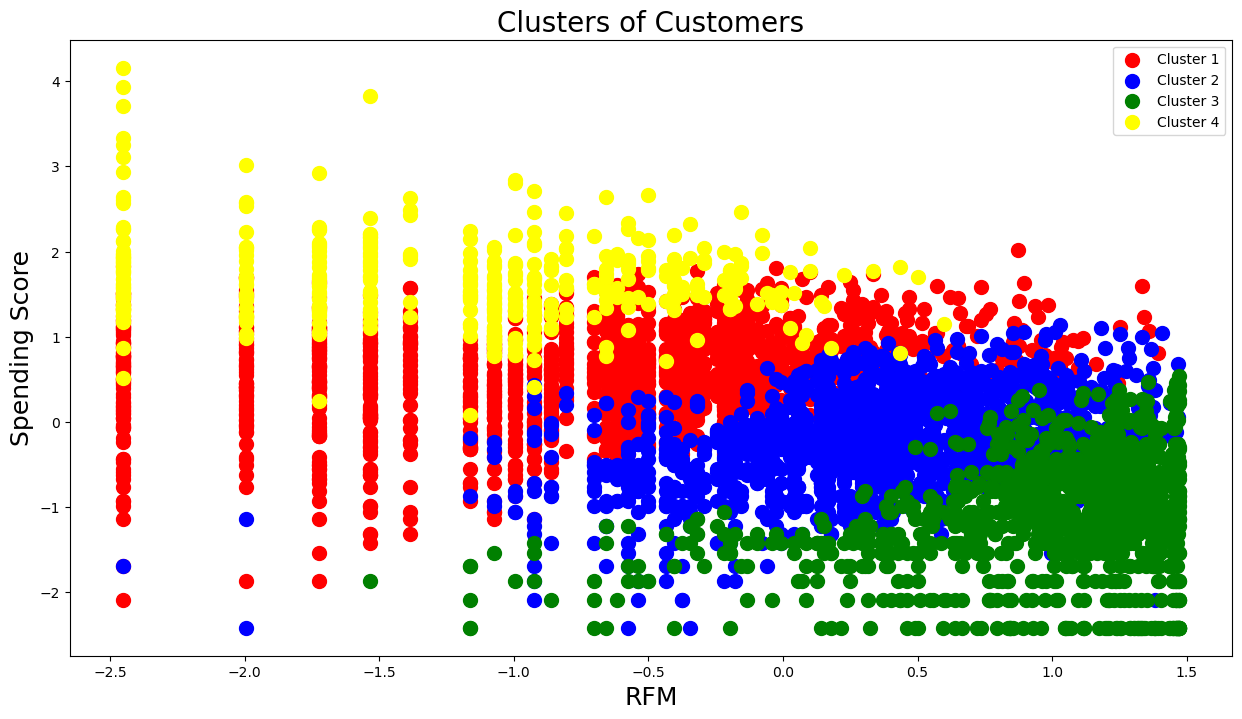

In [67]:
#Cluster =4
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
pred_hc4 = hc.fit_predict(X_scaled)

# Visualisaxtion
plt.figure(figsize=(15, 8))
plt.scatter(X_scaled[pred_hc4 == 0, 0], X_scaled[pred_hc4 == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_scaled[pred_hc4 == 1, 0], X_scaled[pred_hc4 == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_scaled[pred_hc4 == 2, 0], X_scaled[pred_hc4 == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X_scaled[pred_hc4 == 3, 0], X_scaled[pred_hc4 == 3, 1], s=100, c='yellow', label='Cluster 4')

plt.title('Clusters of Customers', size=20)
plt.xlabel('RFM', size=18)
plt.ylabel('Spending Score', size=18)
plt.legend()
plt.show()

In [68]:
# We can see the after increasing the cluster data get sepreated well.


In [69]:
!pip install prettytable
from prettytable import PrettyTable


In [70]:
# Column Names with the Table
myTable = PrettyTable(['SL No.', 'Model_Name', 'Data', 'Optimal_Number_of_cluster'])

# Add rows
myTable.add_row(['1', "K-Means with silhouette_score", "RFM", "3"])
myTable.add_row(['2', "K-Means with Elbow method", "RFM", "3"])
myTable.add_row(['3', "Hierarchical clustering", "RFM", "3"])
myTable.add_row(['4', "Hierarchical clustering", "RFM", "4"])

print(myTable)

+--------+-------------------------------+------+---------------------------+
| SL No. |           Model_Name          | Data | Optimal_Number_of_cluster |
+--------+-------------------------------+------+---------------------------+
|   1    | K-Means with silhouette_score | RFM  |             3             |
|   2    |   K-Means with Elbow method   | RFM  |             3             |
|   3    |    Hierarchical clustering    | RFM  |             3             |
|   4    |    Hierarchical clustering    | RFM  |             4             |
+--------+-------------------------------+------+---------------------------+


# 9. Future Possibilities of the Project

Real-time Customer Segmentation:

Implement online clustering algorithms that can adapt to changing customer behavior in real-time.
Update customer segments dynamically as new data points are received.
Dynamic Personalization:

Provide real-time personalized experiences for users based on their current behavior and preferences.
Adapt content, recommendations, and offers dynamically as users interact with the platform.
Incremental Learning:

Explore incremental learning techniques to continuously update cluster models with new data without retraining from scratch.
Ensure that the model's performance improves over time as more data becomes available.
Adaptive Marketing Strategies:

Develop marketing strategies that can adapt on-the-fly based on the latest cluster assignments.

# 10. Conclusion


In this analysis we have performed various steps to perform customer segmentations. we stated with data warling in which we are tried to handle missing values, duplicated, performed feature engineering. After that we have done some EDA and Visualizations to get the insights from the data.

We have also performed the RFM for our entire customer base.
RFM analysis analysis help us to know various questions with respect to their customers and this help us to make marketing strategies for their customers.

Cluster profiling the average of Recency, frequency and monetary values for each customer segment.
K-means algorithm to segment our customer in various clusters having similar similarity. Also noted more cluster gives better results.


# 11. References


Google and 
Intellipaat Learnings
